In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(image, name='Lenna'):
    plt.imshow(image)
    plt.title(name)
    plt.savefig(name)
    plt.show()

In [3]:
def threshold(img, thresh=127, mode='inverse'):
    im = img.copy()
     
    if mode == 'direct':
        thresh_mode = cv2.THRESH_BINARY
    else:
        thresh_mode = cv2.THRESH_BINARY_INV
     
    _, thresh = cv2.threshold(im, thresh, 255, thresh_mode)
         
    return thresh

In [4]:
def morph_op(img, mode='open', ksize=5, iterations=1):
    im = img.copy()
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(ksize, ksize))
     
    if mode == 'open':
        morphed = cv2.morphologyEx(im, cv2.MORPH_OPEN, kernel)
    elif mode == 'close':
        morphed = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)
    elif mode == 'erode':
        morphed = cv2.erode(im, kernel)
    else:
        morphed = cv2.dilate(im, kernel)
     
    return morphed

In [5]:
def get_bboxes(img):
    contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # Sort according to the area of contours in descending order.
    sorted_cnt = sorted(contours, key=cv2.contourArea, reverse = True)
    # Remove max area, outermost contour.
    sorted_cnt.remove(sorted_cnt[0])
    bboxes = []
    for cnt in sorted_cnt:
        x,y,w,h = cv2.boundingRect(cnt)
        cnt_area = w * h
        bboxes.append((x, y, x+w, y+h))
    return bboxes

In [6]:
def draw_annotations(img, bboxes, thickness=2, color=(0,255,0)):
    annotations = img.copy()
    for box in bboxes:
        tlc = (box[0], box[1])
        brc = (box[2], box[3])
        cv2.rectangle(annotations, tlc, brc, color, thickness, cv2.LINE_AA)
     
    return annotations

(2457, 1890, 3)


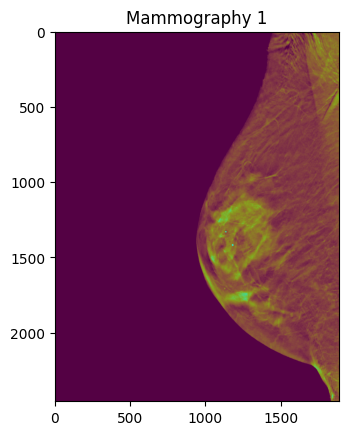

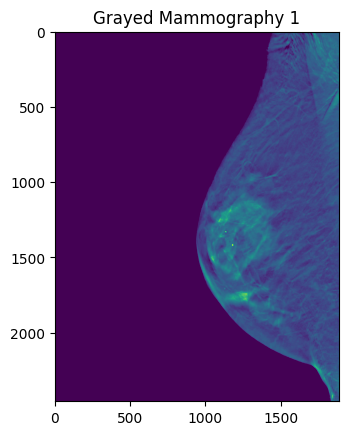

(2457, 1996, 3)


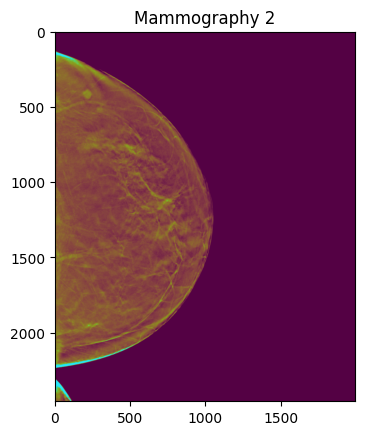

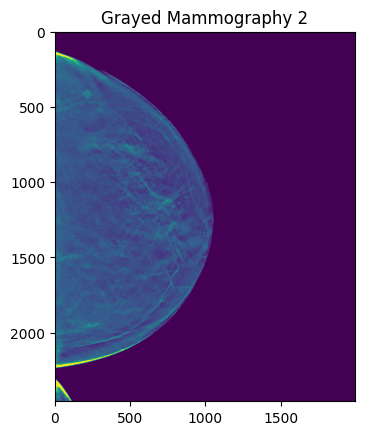

In [7]:
image1 = cv2.imread('Mammo001.png')
image2 = cv2.imread('Mammo002.png')
grayed_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
grayed_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

print(image1.shape)
show_image(image1, 'Mammography 1')
show_image(grayed_image1, 'Grayed Mammography 1')

print(image2.shape)
show_image(image2, 'Mammography 2')
show_image(grayed_image2, 'Grayed Mammography 2')

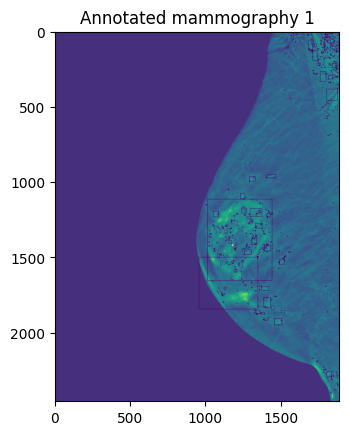

In [8]:
annotated_image1 = draw_annotations(
    grayed_image1,
    get_bboxes(morph_op(threshold(grayed_image1, 100)))
)
show_image(annotated_image1, 'Annotated mammography 1')

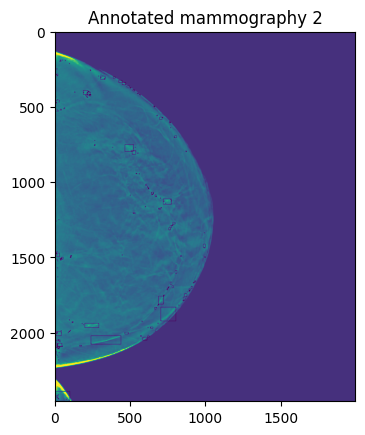

In [9]:
annotated_image2 = draw_annotations(
    grayed_image2,
    get_bboxes(morph_op(threshold(grayed_image2, 110)))
)
show_image(annotated_image2, 'Annotated mammography 2')

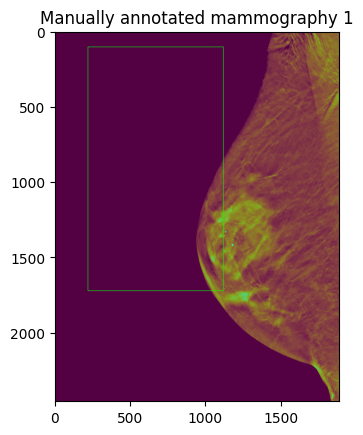

In [10]:
bboxes1 = [(1116, 1724, 218, 105)]
manually_annotated_image1 = draw_annotations(
    image1,
    bboxes1
)
show_image(manually_annotated_image1, 'Manually annotated mammography 1')

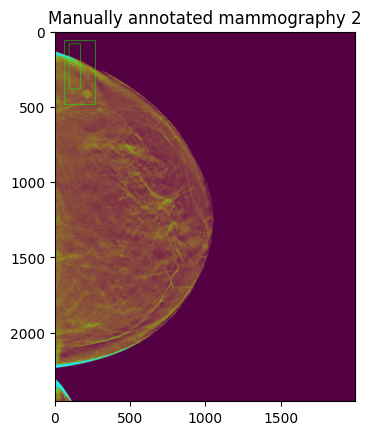

In [11]:
bboxes2 = [(267, 488, 64, 64), (169, 384, 93, 85)]
manually_annotated_image2 = draw_annotations(
    image2,
    bboxes2
)
show_image(manually_annotated_image2, 'Manually annotated mammography 2')